# Data Science Regression Project: Predicting Home Prices in Banglore
https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['area_type','availability','balcony','society'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning: Handle NA values

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna()
df3.shape

(13246, 5)

#Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [9]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0]))
df3.head()


C:\Users\Dell\AppData\Local\Temp/ipykernel_12652/1724357457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3=df3.drop('size',axis='columns')


In [11]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
is_float('9')

True

In [14]:
is_float('200-300')

False

In [15]:
df3[~df3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range

In [16]:
def con_to_float(x):
    tokens=x.split('-')
    if len(tokens)==2:
        p=(float(tokens[0])+float(tokens[1]))/2
        return p
    try:
        return float(x)
    except:
        return None

In [17]:
df4=df3.copy()
df4.total_sqft=df4.total_sqft.apply(con_to_float)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [18]:
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

###### Add new feature called price per square feet

In [19]:
df5=df4.copy()
df5['price_per_sqft']=(df5['price']*100000)/df5.total_sqft

In [20]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


##### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [21]:
df5.location=df5.location.apply(lambda x: x.strip())
location_states=df5['location'].value_counts(ascending=False)

In [22]:
len(location_states)

1293

In [23]:
location_states

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [24]:
location_states.values.sum()

13246

In [25]:
len(location_states[location_states>10])

241

In [26]:
len(location_states)

1293

In [27]:
len(location_states[location_states<=10])

1052

#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [28]:
location_states_less_10=location_states[location_states<=10]
location_states_less_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [29]:
len(df5.location.unique())

1293

In [30]:
df5.location=df5.location.apply(lambda x:'other' if x in location_states_less_10 else x)
len(df5.location.unique())

242

In [31]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

#### normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [32]:
df5[df5.total_sqft/df5.bhk<300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [33]:
df5.shape

(13246, 6)

In [34]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 6)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
minimum=df6.price_per_sqft.min()
minimum

267.82981328435875

In [37]:
#maximum=df6.price_per_sqft.max()
#maximum

In [38]:
#standard=df6.price_per_sqft.std()
#standard

In [39]:
#mea=df6.price_per_sqft.mean()

In [40]:
#up_lim=mea+standard
#low_lim=mea-standard
#up_lim

In [41]:
#low_lim

In [42]:
#df7=df6[(df6.price_per_sqft>low_lim) & (df6.price_per_sqft<up_lim)]
#df7.shape

In [43]:
l=[]
for key in df6.groupby('location'):
    #print(key)
    l.append(key)

l[0]

('1st Block Jayanagar',
                   location  total_sqft  bath  price  bhk  price_per_sqft
 210    1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
 848    1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
 2152   1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
 2355   1st Block Jayanagar      2400.0   4.0  450.0    4    18750.000000
 4991   1st Block Jayanagar      1000.0   3.0   60.0    2     6000.000000
 7138   1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
 7358   1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668
 7383   1st Block Jayanagar      2750.0   4.0  413.0    4    15018.181818
 8507   1st Block Jayanagar      1760.0   3.0  115.0    3     6534.090909
 10972  1st Block Jayanagar      2450.0   4.0  368.0    4    15020.408163)

In [44]:
for subdf in df6.groupby('location'):
    print(subdf)

('1st Block Jayanagar',                   location  total_sqft  bath  price  bhk  price_per_sqft
210    1st Block Jayanagar      2850.0   4.0  428.0    4    15017.543860
848    1st Block Jayanagar      1630.0   3.0  194.0    3    11901.840491
2152   1st Block Jayanagar      1875.0   2.0  235.0    3    12533.333333
2355   1st Block Jayanagar      2400.0   4.0  450.0    4    18750.000000
4991   1st Block Jayanagar      1000.0   3.0   60.0    2     6000.000000
7138   1st Block Jayanagar      1200.0   2.0  130.0    3    10833.333333
7358   1st Block Jayanagar      1235.0   2.0  148.0    2    11983.805668
7383   1st Block Jayanagar      2750.0   4.0  413.0    4    15018.181818
8507   1st Block Jayanagar      1760.0   3.0  115.0    3     6534.090909
10972  1st Block Jayanagar      2450.0   4.0  368.0    4    15020.408163)
('1st Phase JP Nagar',                  location  total_sqft  bath  price  bhk  price_per_sqft
936    1st Phase JP Nagar      2825.0   4.0  250.0    4     8849.557522
2106 

('Begur Road',          location  total_sqft  bath  price  bhk  price_per_sqft
55     Begur Road      1200.0   2.0  44.00    2     3666.666667
71     Begur Road      1358.0   2.0  80.58    2     5933.726068
374    Begur Road      1200.0   2.0  46.80    2     3900.000000
383    Begur Road      1160.0   2.0  44.00    2     3793.103448
517    Begur Road      1584.0   3.0  65.00    3     4103.535354
...           ...         ...   ...    ...  ...             ...
12561  Begur Road      1215.0   2.0  43.75    2     3600.823045
12709  Begur Road      1200.0   2.0  44.73    2     3727.500000
12751  Begur Road      1160.0   2.0  42.00    2     3620.689655
12788  Begur Road      1583.0   3.0  95.23    3     6015.792798
12958  Begur Road      1410.0   2.0  54.99    3     3900.000000

[81 rows x 6 columns])
('Bellandur',         location  total_sqft  bath  price  bhk  price_per_sqft
23     Bellandur      1767.0   3.0  103.0    3     5829.088851
192    Bellandur      1200.0   5.0  325.0    4    270

('Indira Nagar',            location  total_sqft  bath   price  bhk  price_per_sqft
663    Indira Nagar      2200.0   4.0   200.0    4     9090.909091
1002   Indira Nagar      1200.0   2.0    93.0    2     7750.000000
1128   Indira Nagar      1128.0   2.0   105.0    2     9308.510638
1774   Indira Nagar      2800.0   3.0   330.0    3    11785.714286
2066   Indira Nagar      1650.0   3.0   200.0    3    12121.212121
3249   Indira Nagar      1875.0   3.0   180.0    3     9600.000000
3260   Indira Nagar      1210.0   2.0   102.0    2     8429.752066
3308   Indira Nagar      1224.0   2.0   105.0    2     8578.431373
3440   Indira Nagar      2480.0   4.0   750.0    6    30241.935484
3486   Indira Nagar      2070.0   3.0   225.0    3    10869.565217
3548   Indira Nagar       500.0   1.0    70.0    1    14000.000000
3918   Indira Nagar      1400.0   2.0   168.0    2    12000.000000
4058   Indira Nagar      2400.0   4.0   525.0    4    21875.000000
4074   Indira Nagar      1407.0   3.0   120.0

('Lakshminarayana Pura',                    location  total_sqft  bath  price  bhk  price_per_sqft
53     Lakshminarayana Pura      1185.0   2.0   75.0    2     6329.113924
375    Lakshminarayana Pura      1600.0   2.0  108.0    3     6750.000000
934    Lakshminarayana Pura      1680.0   3.0  150.0    3     8928.571429
1251   Lakshminarayana Pura      1180.0   2.0   75.0    2     6355.932203
1991   Lakshminarayana Pura      1172.0   2.0   82.0    2     6996.587031
2137   Lakshminarayana Pura      1750.0   3.0  150.0    3     8571.428571
2233   Lakshminarayana Pura      1179.0   2.0   75.0    2     6361.323155
3093   Lakshminarayana Pura      1149.0   2.0   75.0    2     6527.415144
3434   Lakshminarayana Pura      1336.0   2.0  100.0    2     7485.029940
3779   Lakshminarayana Pura      1175.0   2.0   75.0    2     6382.978723
3816   Lakshminarayana Pura      1190.0   2.0   75.0    2     6302.521008
4147   Lakshminarayana Pura      1200.0   2.0   75.0    2     6250.000000
4158   Lakshm

('Sarjapura - Attibele Road',                         location  total_sqft  bath   price  bhk  \
97     Sarjapura - Attibele Road      1330.0   2.0   48.00    3   
1962   Sarjapura - Attibele Road      1329.0   2.0   45.95    3   
3077   Sarjapura - Attibele Road      1800.0   4.0  110.00    4   
3226   Sarjapura - Attibele Road       829.0   2.0   22.80    2   
3563   Sarjapura - Attibele Road      2400.0   3.0   85.00    3   
3614   Sarjapura - Attibele Road      1033.0   2.0   28.41    2   
3699   Sarjapura - Attibele Road      1676.0   3.0   52.00    3   
6432   Sarjapura - Attibele Road      1800.0   3.0   90.00    3   
7173   Sarjapura - Attibele Road      1308.0   2.0   37.00    2   
7428   Sarjapura - Attibele Road      1073.0   2.0   31.77    2   
8487   Sarjapura - Attibele Road      3750.0   6.0  295.00    5   
9427   Sarjapura - Attibele Road      1330.0   2.0   49.00    3   
9621   Sarjapura - Attibele Road      3750.0   6.0  295.00    5   
10267  Sarjapura - Attibele Road

In [45]:
#(df6.groupby('location')[0])

#### Outlier Removal Using Standard Deviation and Mean

In [46]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):  # key and subdf list of data of any particular location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 6)

##### check if for a given location how does the 2 BHK and 3 BHK property prices look like

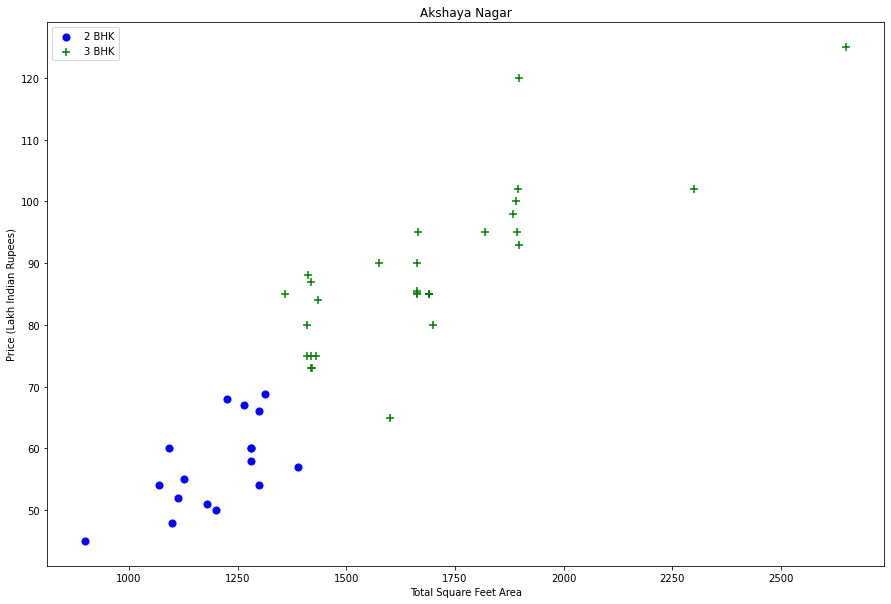

In [47]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Akshaya Nagar")

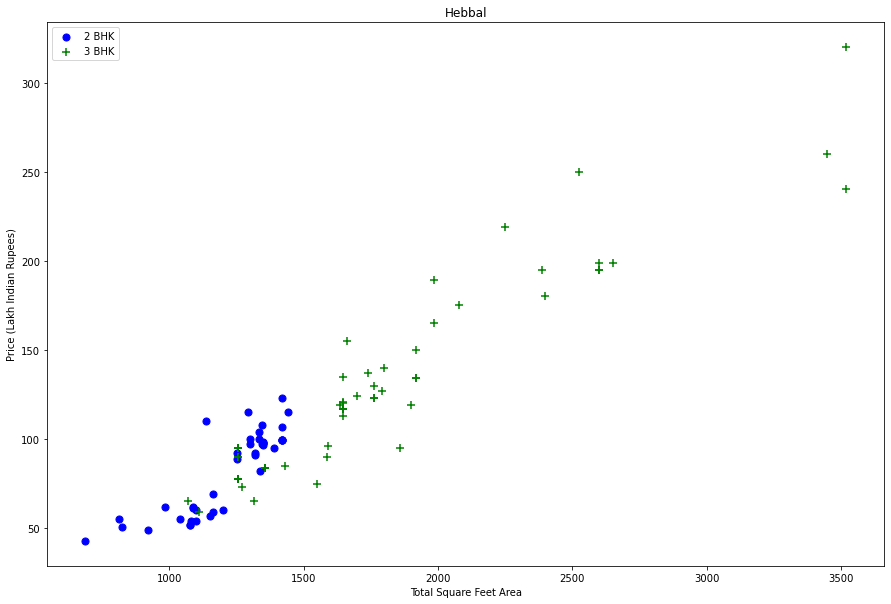

In [48]:
plot_scatter_chart(df7,"Hebbal")

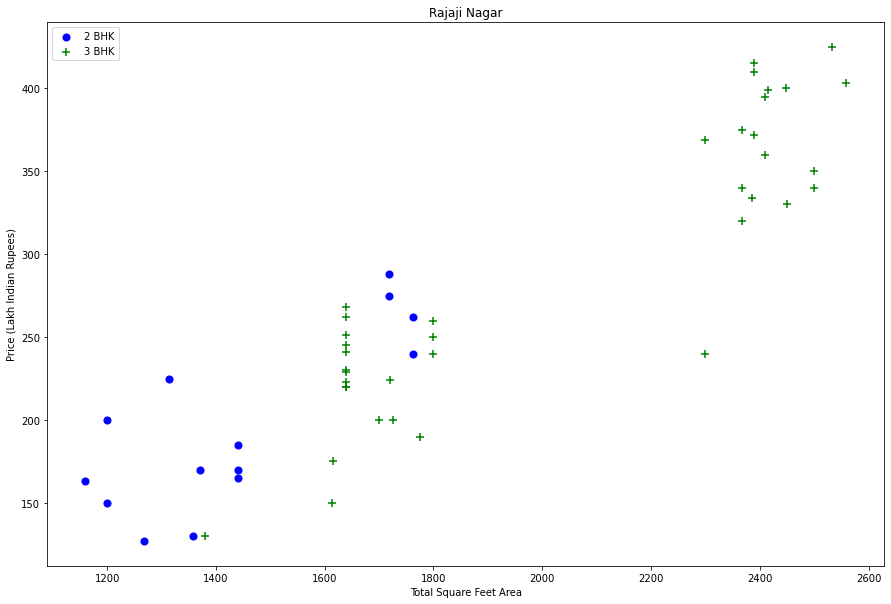

In [49]:
plot_scatter_chart(df7,"Rajaji Nagar")

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

df8.shape

(7329, 6)

#### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

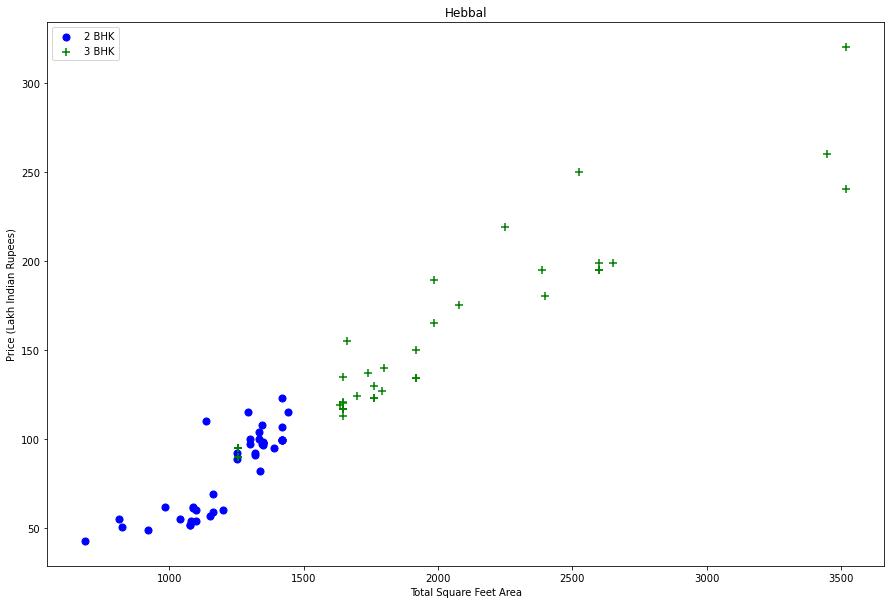

In [51]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'count')

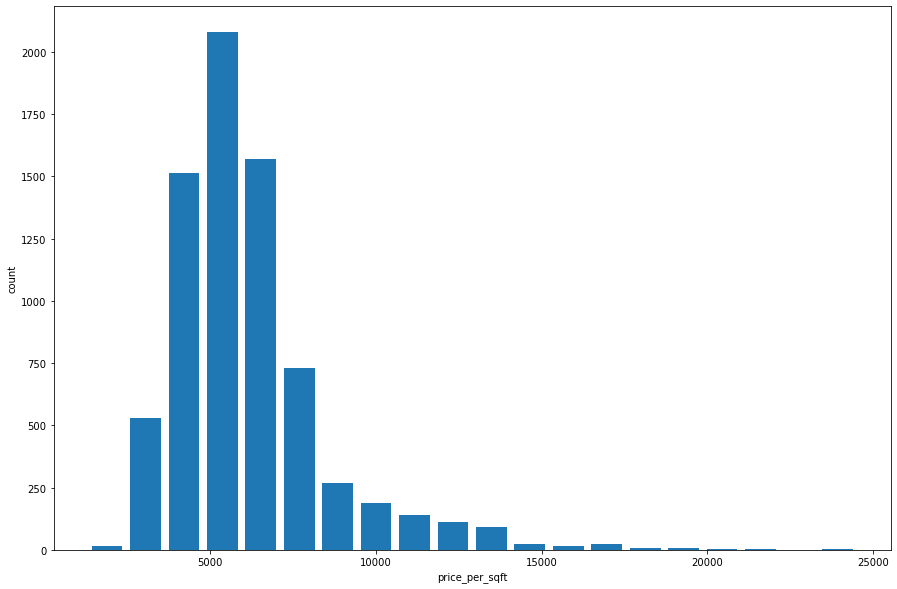

In [52]:
import matplotlib
plt.hist(df8.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [53]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [54]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

#### Outlier Removal Using Bathrooms Feature

Text(0, 0.5, 'count')

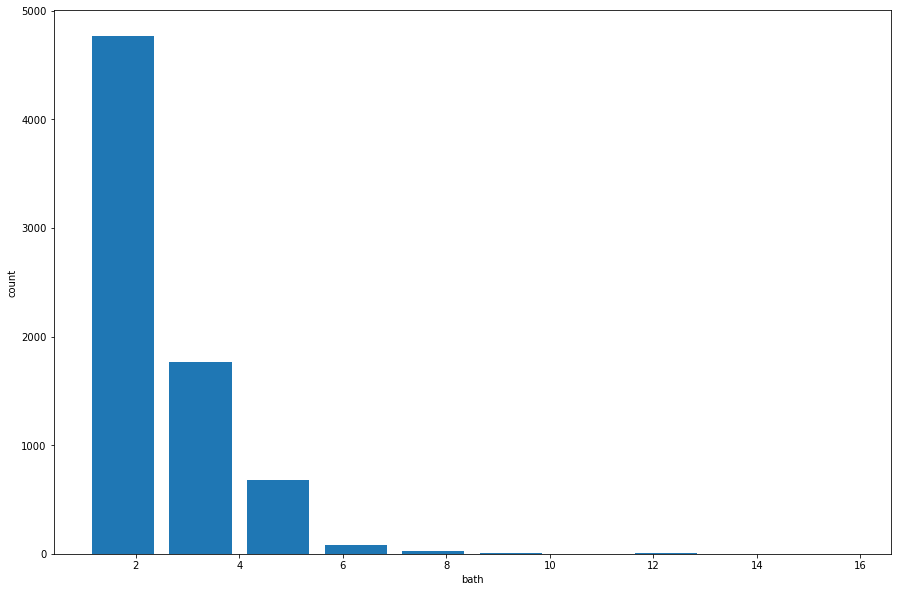

In [55]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('bath')
plt.ylabel('count')

In [56]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


#### you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [57]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [58]:
df9=df8[df8.bath<df8.bhk+2]

In [59]:
df9.shape

(7251, 6)

In [60]:
df9.head(2)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491


In [61]:
df10=df9.drop('price_per_sqft',axis=1)

#### Use One Hot Encoding For Location

In [62]:
dummies=pd.get_dummies(df10['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df10.shape

(7251, 5)

In [64]:
dummies.shape

(7251, 242)

In [65]:
dd=dummies.drop('other',axis='columns')
dd.shape

(7251, 241)

In [66]:
df11=pd.concat([df10,dd],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df11.shape

(7251, 246)

In [68]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df12.shape

(7251, 245)

In [70]:
df12.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [71]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y=df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [73]:
len(y)

7251

#### Build a Model Now...

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [75]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()

In [76]:
rg.fit(X_train,y_train)

LinearRegression()

In [77]:
rg.score(X_test,y_test)

0.8452277697874278

##### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

##### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score

In [79]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [80]:
X.shape

(7251, 244)

In [81]:
def find_best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
            
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        score.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        
        })
        return pd.DataFrame(score,columns=['model','best_score','best_params'])
    


In [82]:
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}


#### Test the model for few properties

In [83]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return rg.predict([x])[0]

In [84]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677167729

In [85]:
predict_price('Nagasandra',7000,8,4)

545.4608032927622

In [86]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.805193951943

In [87]:
predict_price('Indira Nagar',1000, 2, 2)

181.27815484007027

##### Export the tested model to a pickle file

In [88]:
import pickle
with open('bangalore_home_price_model.pickle','wb') as f:
    pickle.dump(rg,f)

In [89]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))